##  Charger les données

In [1]:
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode


/home/zahrael97/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
data=pd.read_csv("diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


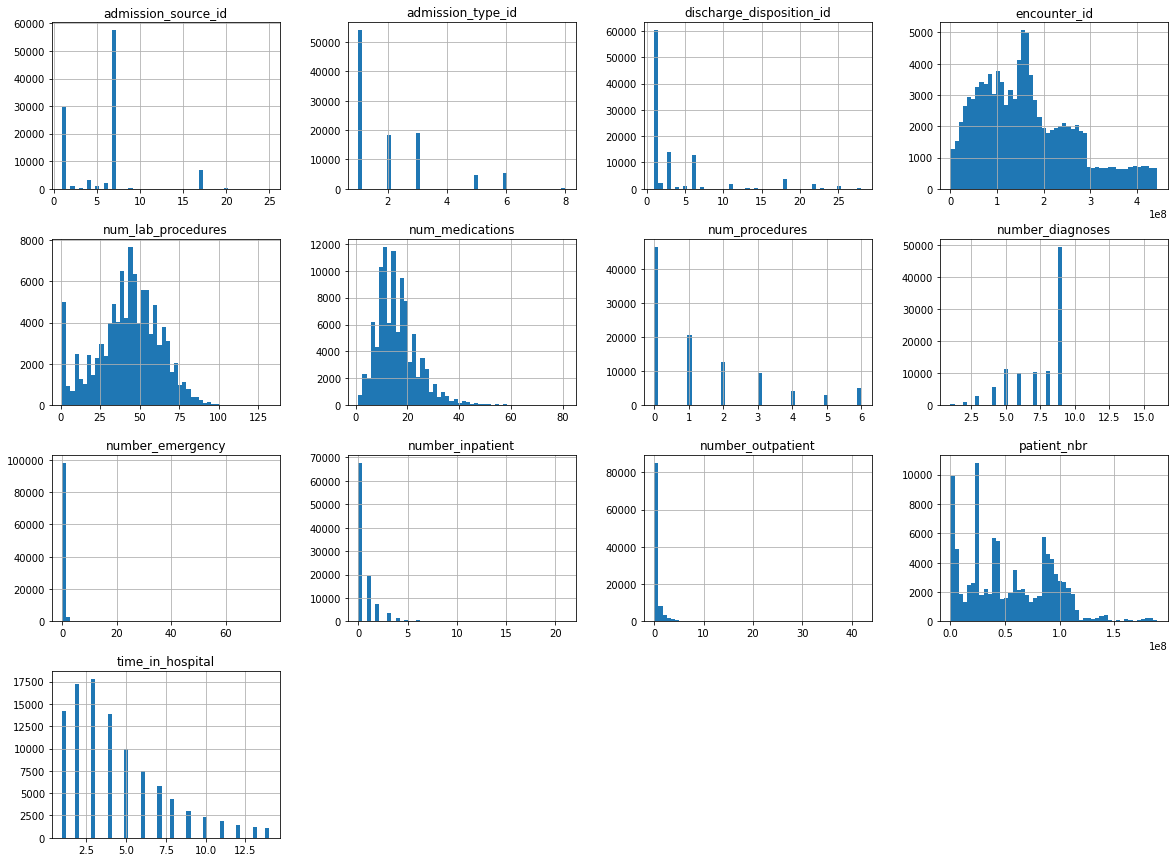

In [8]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

# Préparation de Données Pour  L'analyse

In [3]:
#supprimer les valeurs manquantes

datacopy = data.copy() 
Rep = datacopy.replace('?', np.NaN) 
nacheck = Rep.isnull().sum() 
nacheck


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
#De ce qui précède, nous pouvons voir que "Weight, payer_code et medical_specialty" ont beaucoup de valeurs manquantes,
#c'est mieux donc de supprimer ces valeurs de dataset !
datacopy= datacopy.drop(['weight','payer_code','medical_specialty'],axis=1)


In [5]:
datacopy['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [6]:
#on peux voir qu'il y a 3 types de valeurs :- 'NO','<30','>30'. 
datacopy['30readmit'] = np.where(datacopy['readmitted'] == 'NO', 0, 1)


In [7]:
datacopy.groupby('30readmit').size()

30readmit
0    54864
1    46902
dtype: int64

In [8]:
# Suppression des patients morts de l'ensemble de données.




datacopy = datacopy[((datacopy.discharge_disposition_id != 11) & 
                                          (datacopy.discharge_disposition_id != 13) &
                                          (datacopy.discharge_disposition_id != 14) & 
                                          (datacopy.discharge_disposition_id != 19) & 
                                          (datacopy.discharge_disposition_id != 20) & 
                                          (datacopy.discharge_disposition_id != 21))] 

In [9]:
datacopy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


### Exécution d'une analyse exploratoire des données

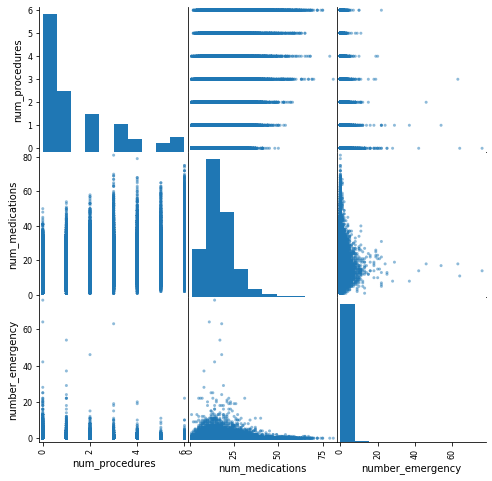

In [10]:
# Voyons la relation entre les différentes variables pour comprendre les données et s'il existe une forte corrélation 
# entre deux variables alors nous pouvons considérer l'une d'entre elles.
import seaborn as sns
from pandas.plotting import scatter_matrix

sm = scatter_matrix(datacopy[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

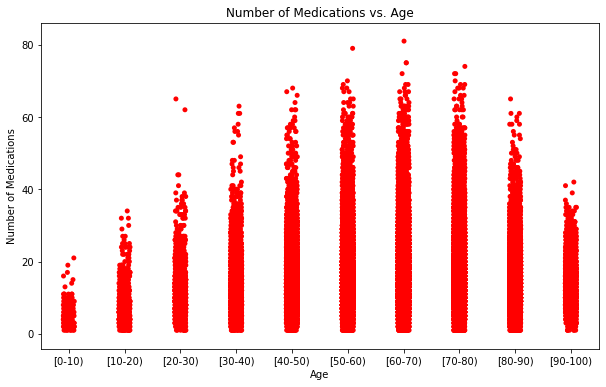

In [11]:
# variation entre l'age et le nombre de médicaments prises par le patient 
sortage = datacopy.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

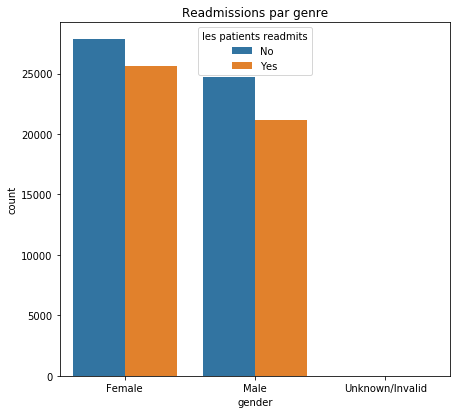

In [12]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = '30readmit', data = datacopy) 
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'les patients readmits', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions par genre')
plt.show()

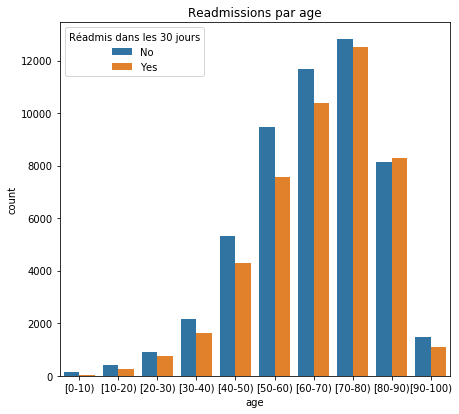

In [13]:


b = datacopy.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = '30readmit', data = datacopy, order = b_sort) 

ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Réadmis dans les 30 jours', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions par age')
plt.show()

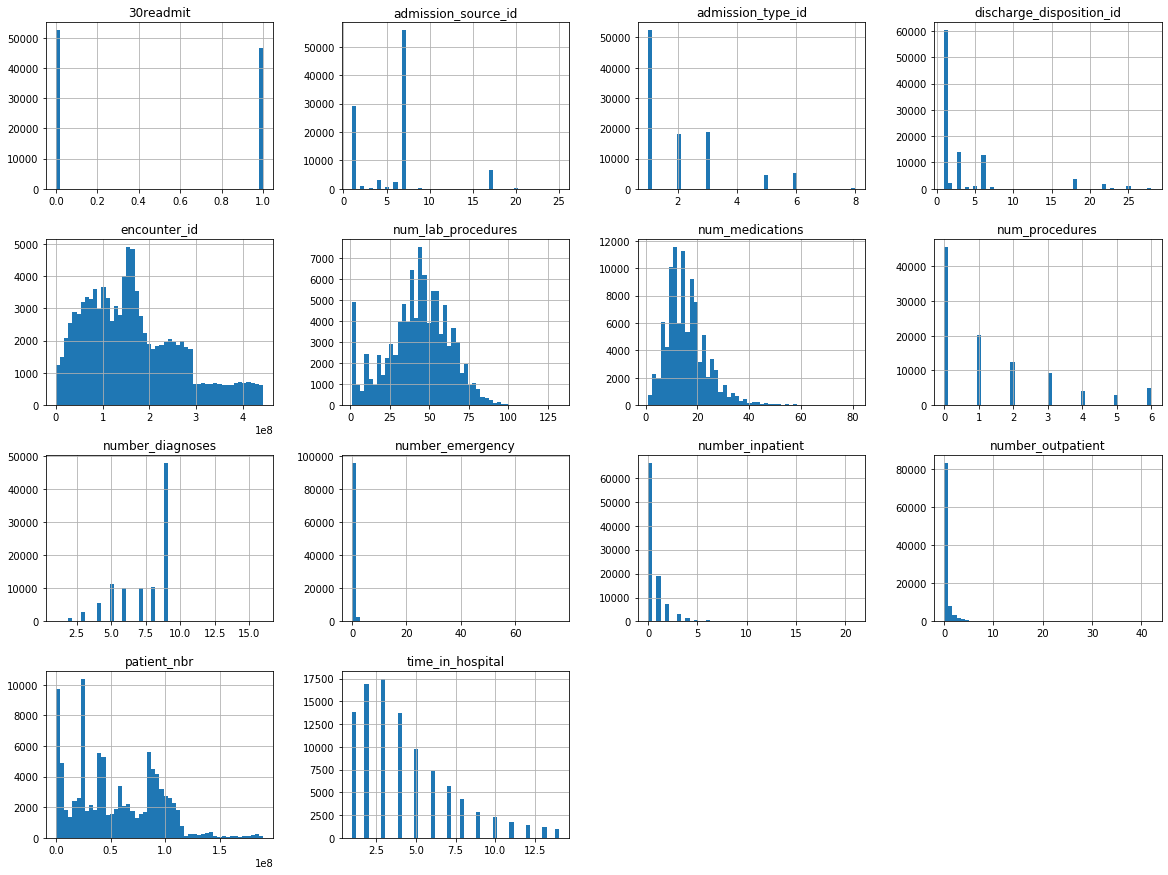

In [14]:
# Afficher les variables numeriques,

%matplotlib inline
import matplotlib.pyplot as plt
datacopy.hist(bins=50, figsize=(20,15))
plt.show()

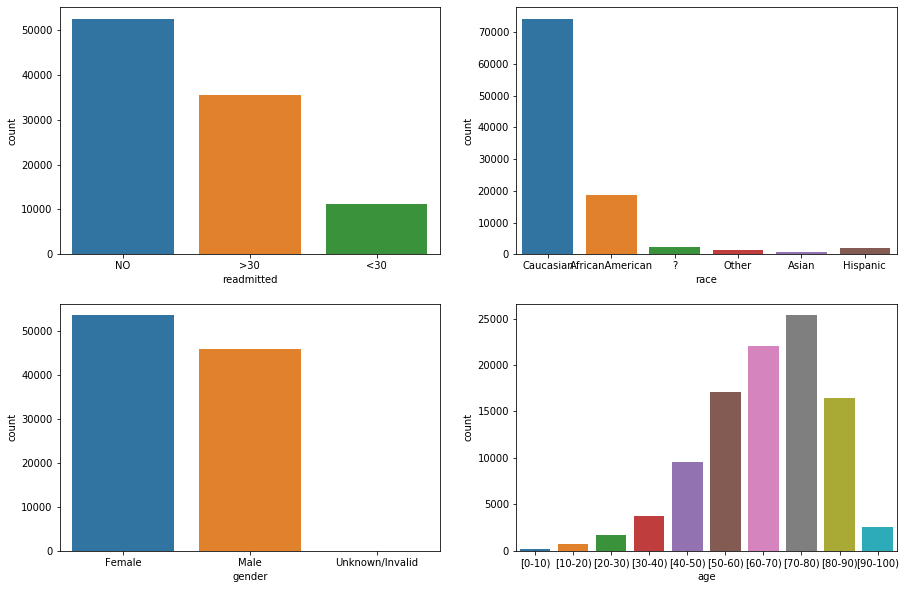

In [15]:
# Exploration des variable categoriques,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=datacopy, ax=ax[0][0])
sns.countplot(x="race", data=datacopy, ax=ax[0][1])
sns.countplot(x="gender", data=datacopy, ax=ax[1][0])
sns.countplot(x="age", data=datacopy, ax=ax[1][1])


# Prédiction à l'aide de modèles ML

In [17]:
#Nettoyage des données, remplacement des valeurs nulles des données numériques par 0 et des données d'objet par inconnu,

numcolumn = datacopy.select_dtypes(include = [np.number]).columns
objcolumn = datacopy.select_dtypes(include = ['object']).columns

In [18]:
data[numcolumn] = datacopy[numcolumn].fillna(0)
data[objcolumn] = datacopy[objcolumn].fillna("unknown")


In [19]:
data.head(100)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1260216,92117574,?,Male,[30-40),2,6,4,6,72,...,Steady,No,No,No,No,No,Ch,Yes,>30,1
102,1262736,50253120,Caucasian,Female,[30-40),2,1,4,3,22,...,No,No,No,No,No,No,No,Yes,NO,0
103,1270524,67897251,Caucasian,Male,[60-70),1,2,7,1,59,...,Steady,No,No,No,No,No,No,Yes,NO,0
104,1274802,71003736,AfricanAmerican,Female,[70-80),1,1,7,3,31,...,Down,No,No,No,No,No,Ch,Yes,NO,0


In [20]:
# Maintenant, regardons à nouveau l'ensemble de données et supprimons les colonnes non pertinentes,
datacopy.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6            

In [21]:
data = data.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1) 


In [22]:
data1.head(2)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30readmit
0,Caucasian,Female,[0-10),25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,1


#### Normalisation des données

In [23]:
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormal] = normal.fit_transform(data1[listnormal])

data1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30readmit
count,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,3.517882,5.731083,1.874346e-14,-3.424256e-15,3.449070e-15,-1.776343e-15,1.182191e-13,6.322393e-14,-1.499301e-15,-9.426101e-14,0.471256
std,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000
25%,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000
50%,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,0.000000
75%,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000
max,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,1.000000


In [24]:
#Let's store readmitted in y and rest of the columns in X,

Y = data1['30readmit']
X = data1.drop(['30readmit'], axis =1)
X = pd.get_dummies(X)

##### Splitting the data into training and vallidation data sets. The training data will contain 80 % of the data and validation will contain remaining 20%

In [25]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [26]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 2363) (19869, 2363)


# Logistic Regression

In [27]:
# créer un modèle de régression logistique à l'aide de Sklearn

from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
# Vérification du score du modèle

print(" The accuracy of the Logistic regression model is:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model is: 0.6290704111933162


In [29]:
# vérification de la matrice de confusion

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8388 2118]
 [5252 4111]]


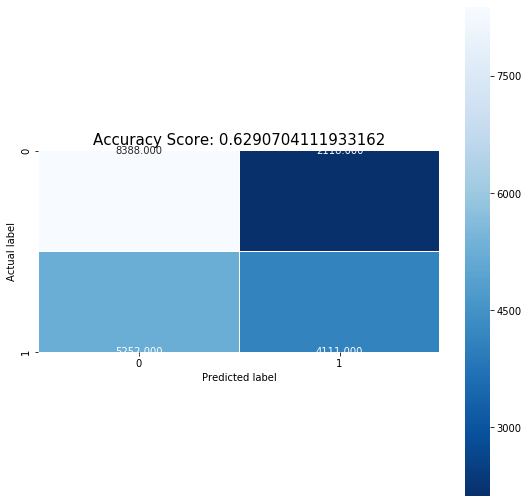

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.15, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [31]:
# Vérification du résumé de la classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.80      0.69     10506
         YES       0.66      0.44      0.53      9363

    accuracy                           0.63     19869
   macro avg       0.64      0.62      0.61     19869
weighted avg       0.64      0.63      0.62     19869



In [32]:
# Vérification des performances du modèle à l'aide de tracés de courbes ROC
YScre = logisticreg.decision_function(Xtest)

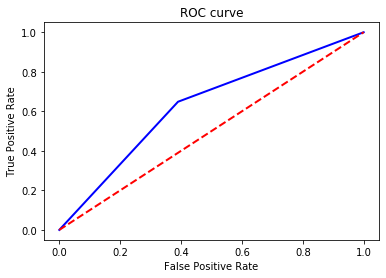

In [33]:
##calculer false et true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [35]:
#Calculating the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [36]:
#Checking the accuracy,

print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6444712869293875


In [37]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7674 2832]
 [4232 5131]]


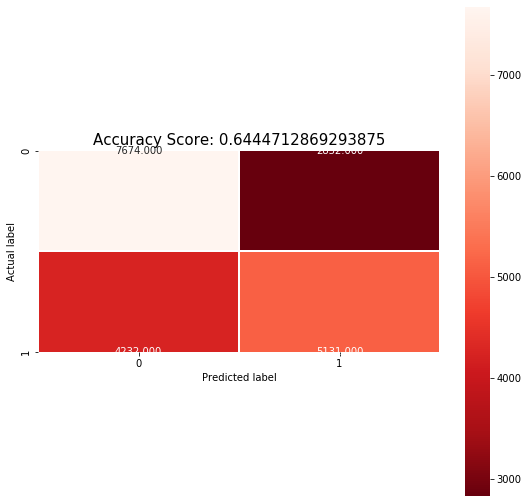

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [39]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.73      0.68     10506
         YES       0.64      0.55      0.59      9363

    accuracy                           0.64     19869
   macro avg       0.64      0.64      0.64     19869
weighted avg       0.64      0.64      0.64     19869



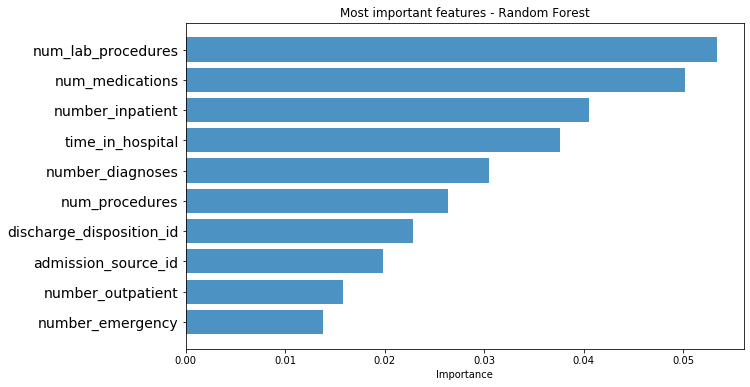

In [40]:
#Determiner le feature le plus important,
feature_names = Xtrain.columns 
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# Decision tree

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [42]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [43]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 1, 0, ..., 1, 0, 1])

In [44]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  62.358447833308176


## Comparer les models

In [45]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )#decision tree

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'True Positive Rate')

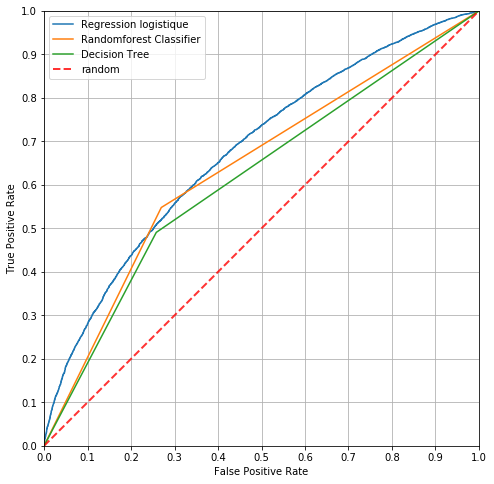

In [51]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Regression logistique')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [53]:
print("Score de regression logistique:" ,logisticreg.score(Xtest, Ytest)*100)
print("Score de Decision Tree ", accuracy_score(Ytest,ypreddt)*100)
print("Score de Random forest classification: ", random_forest.score(Xtest, Ytest)*100)


Score de regression logistique: 62.907041119331616
Score de Decision Tree  62.358447833308176
Score de Random forest classification:  64.44712869293875
